# Diabetes dataset, into data analysis

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy import stats
from sklearn import datasets

The dataset can be loaded from sklearn module dataset. Sadly, documentation on this particular dataset is extremely scarce, therefore we need to work on the dataset itself a little.

In [3]:
diabetes = datasets.load_diabetes()

### It is quite convenient to turn the dataset into pandas DataFrame object at the very beginning. 
Since I plan to use seaborn, which is based on matplotlib, this makes any visualisations quite simple. 
The same goes for scipy lib.

It is worth noting that we need to classify the data first. Here are things to observe
1. Dataset is standarized - this makes it quite difficult, or sometimes impossible to reach all important information
2. The dataset is not proberly described

The latter is much more serious issue, since we do not know what the corresponding columns mean - there is also no mention about it in the sklearn documentation. Luckily, after some intensive search, I have managed to find a source 

    http://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.html
    
In this link you can find details on what the diabetes dataset actually represents.

### Note the following excerpt:
   
    "Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

This helps us to identify the instances present in the data. Create the index, that will serve as identifier heading in our DataFrame

In [4]:
index = ["age", "sex", "bmi", "avbp" , "s1", "s2", "s3", "s4", "s5", "s6"]

In [5]:
df = pd.DataFrame(diabetes['data'], columns=index)

In [6]:
df.head()

,age,sex,bmi,avbp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Now we clearly see that DataFrame is properly described

Now it is also the time to add the our target - name it "y" for instance. It will represent the aforementioned : 

    "a quantitative measure of disease progression one year after baseline."
    
Since the data was initially in pseudo-dictionary form, we can add second DataFrame object with just "Y" and the join it with our df, containing the instances and samples.

In [7]:
dfy = pd.DataFrame(diabetes['target'], columns=['Y'])
print (df.shape, dfy.shape)

(442, 10) (442, 1)


Displaying the sizes of DataFrames indicates the way the two object should be merged

In [8]:
df = pd.concat([df, dfy], axis = 1)
df.head()

,age,sex,bmi,avbp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


We confirmed that DataFrame object was correctly merged. 

    Note that displaying the data in that manner is sometimes not enough. Because in this case, data seems unbiased (in sense the dataset was randomly filled in, or the subjects were drawn form normal distribution), we can firlmy state that the order of entries does not matter. However, always try to verify that, because especially in large datasets, taking a chunk of it, e.g. first 10k entries, might influence the further data analysis.

We can now see some basic info about our DataFrame.

In [9]:
df[['age', 'sex', 'bmi', 'avbp']].describe()

,age,sex,bmi,avbp
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01


And about mysterious blood serums

In [10]:
df[['s1', 's2', 's3', 's4', 's5', 's6']].describe()

,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Now let's throw in some visualisation that will help us to see some patterns in data, if there are any to be seen.
We will use seaborn for that
 1. See if the samples follow any distribution, age is the best instance to check that
 2. Perhaps look at how the our "Y", i.e. measure of condition's development, is correlated to age
 3. Maybe subject's sex is somehow connected to the likelihood of developing diabetes?

[<matplotlib.text.Text at 0x8d16a90>, <matplotlib.text.Text at 0x82dcad0>]

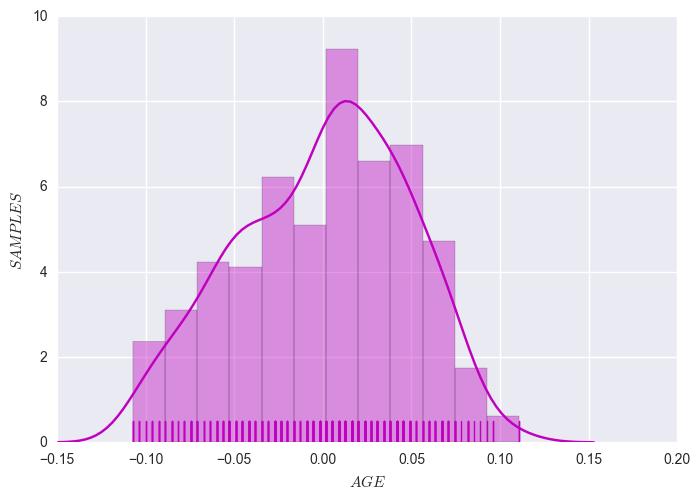

In [11]:
dist = sns.distplot(df['age'], rug=True, color='m')
dist.set(xlabel="$AGE$", ylabel="$SAMPLES$")

It looks fammiliar to skewed normal distribution to me, it is somehow expected. We are happy to see, that the sampling is enough for the distribution to have this bell-shape. (According to CLT, this result is not surprising).

[<matplotlib.text.Text at 0xa3665f0>, <matplotlib.text.Text at 0xa309ad0>]

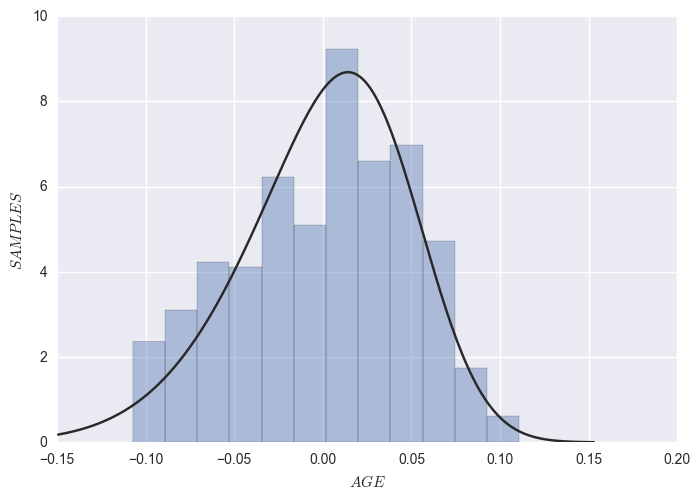

In [12]:
dist = sns.distplot(df['age'], kde=False, fit=stats.skewnorm)
dist.set(xlabel="$AGE$", ylabel="$SAMPLES$")

Now let us see how it is correlated to the "Y" measure

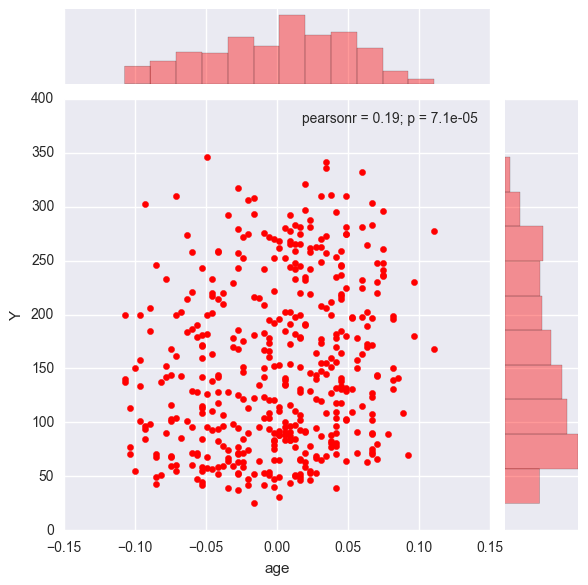

In [13]:
cor = sns.jointplot(x="age", y="Y", data = df, color ='r')

Perhaps turning it into kernel plot would help

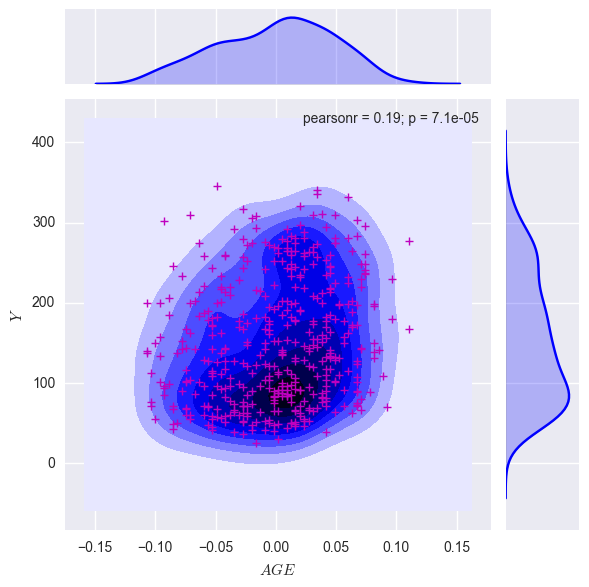

In [14]:
kp = sns.jointplot(x='age', y='Y', data=df, kind='kde', color='b')
kp.plot_joint(plt.scatter, c='m', s=30, linewidth=1, marker="+")
kp.set_axis_labels("$AGE$", "$Y$")

[<matplotlib.text.Text at 0xa2b8490>, <matplotlib.text.Text at 0xa31dd90>]

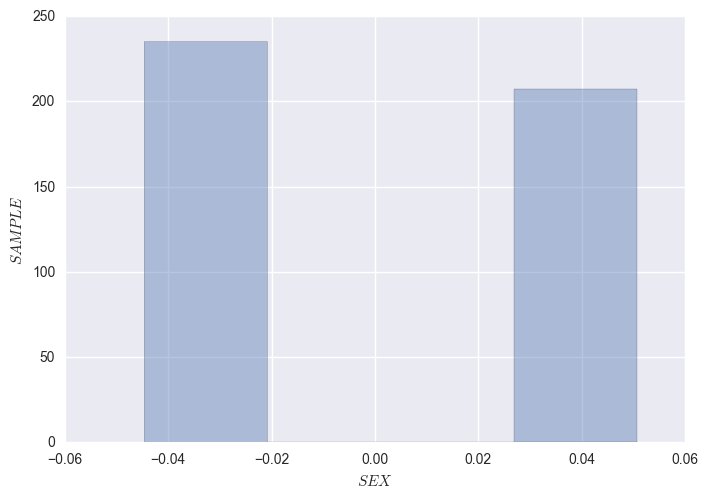

In [15]:
sd = sns.distplot(df['sex'], kde=False)
sd.set(xlabel="$SEX$", ylabel="$SAMPLE$")

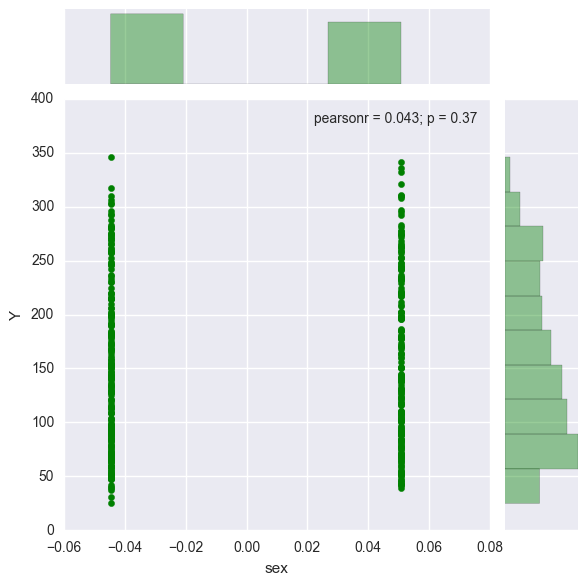

In [16]:
s_y = sns.jointplot(x="sex", y="Y", data = df, color ='g')

Above results yield little information, maybe we should try to find specifics for a particular sex

In [17]:
print(df['age'][df['sex']>0].count())
print(df['age'][df['sex']<0].count())

207
235


In [18]:
sex_A = df[['age', 'bmi' , 'avbp', 'Y']][df['sex']>0]
sex_B = df[['age', 'bmi' , 'avbp', 'Y']][df['sex']<0]

print (sex_A.shape, sex_B.shape)

print ("Below stats for sex_A and sex_B")

(207, 4) (235, 4)
Below stats for sex_A and sex_B


In [19]:
print ("SEX A")
print(sex_A.describe())
print ("SEX B")
print(sex_B.describe())

SEX A
              age         bmi        avbp           Y
count  207.000000  207.000000  207.000000  207.000000
mean     0.008805    0.004468    0.012215  155.666667
std      0.046125    0.045379    0.043427   78.453313
min     -0.103593   -0.090275   -0.084857   39.000000
25%     -0.027310   -0.025607   -0.019442   88.000000
50%      0.016281   -0.005128    0.008101  141.000000
75%      0.041708    0.028284    0.049415  220.500000
max      0.110727    0.170555    0.107944  341.000000
SEX B
              age         bmi        avbp           Y
count  235.000000  235.000000  235.000000  235.000000
mean    -0.007756   -0.003936   -0.010759  149.021277
std      0.047661    0.049269    0.048632   75.905781
min     -0.107226   -0.084886   -0.112400   25.000000
25%     -0.041840   -0.045007   -0.043542   85.500000
50%     -0.001882   -0.009439   -0.022885  140.000000
75%      0.023546    0.034212    0.021872  200.000000
max      0.096197    0.160855    0.132044  346.000000


[<matplotlib.text.Text at 0xab4f910>, <matplotlib.text.Text at 0xab49a50>]

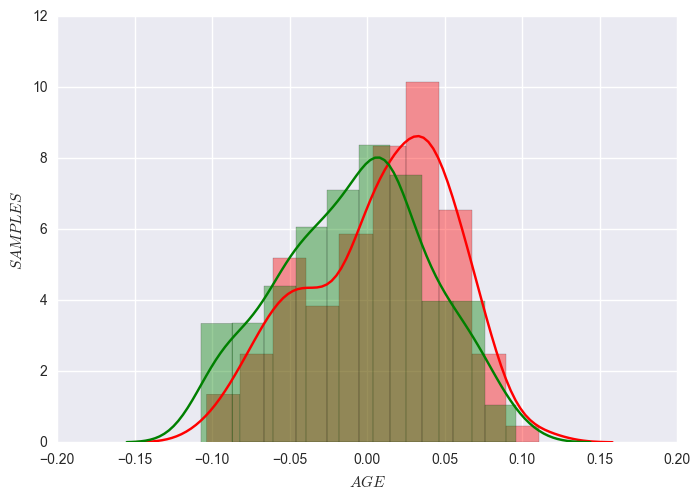

In [20]:
sex_A_age = sns.distplot(sex_A['age'], color ='r')
sex_B_age = sns.distplot(sex_B['age'], color ='g')
sex_A_age.set(xlabel="$AGE$", ylabel="$SAMPLES$")

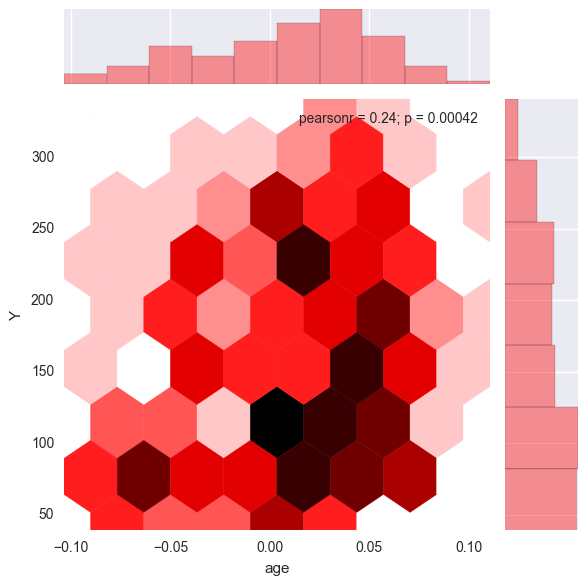

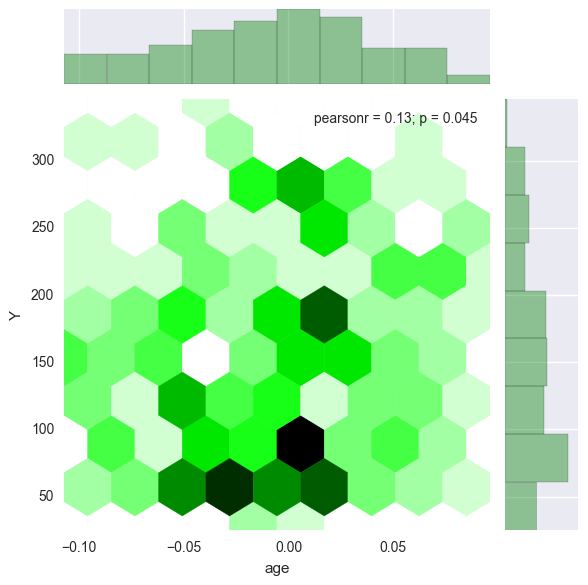

In [21]:
sns.jointplot(x='age', y='Y', kind='hex', color = "r", data = sex_A)
sns.jointplot(x='age', y='Y', kind='hex', color = "g", data = sex_B)

### Some conlusions
We see that the two are significantly different - sex A has an inclination to develop diabetes in elder age, wheres sex B does not develop diabietes to the same extent in the same age intervals. It could be said, that in case of sex B more people are developing diabetes in middle age, but it does not develop further to more advanced stadiums. However, please note that from the distribution of samples, in respect to sex of a subject, we see that two curves are skewed differently, with sex A having a mean shifted towards elder ages than B.

Now let's develop some pairplots - I would like to see how the sets are represented in terms of the following pairs:

1. age - bmi
2. bmi - "Y"
3. average blood pressure - age
4. average blood pressure - bmi

for each sex.

Seaborn's pairplot module provides very comfortable way to do this. In addition we get some extra features

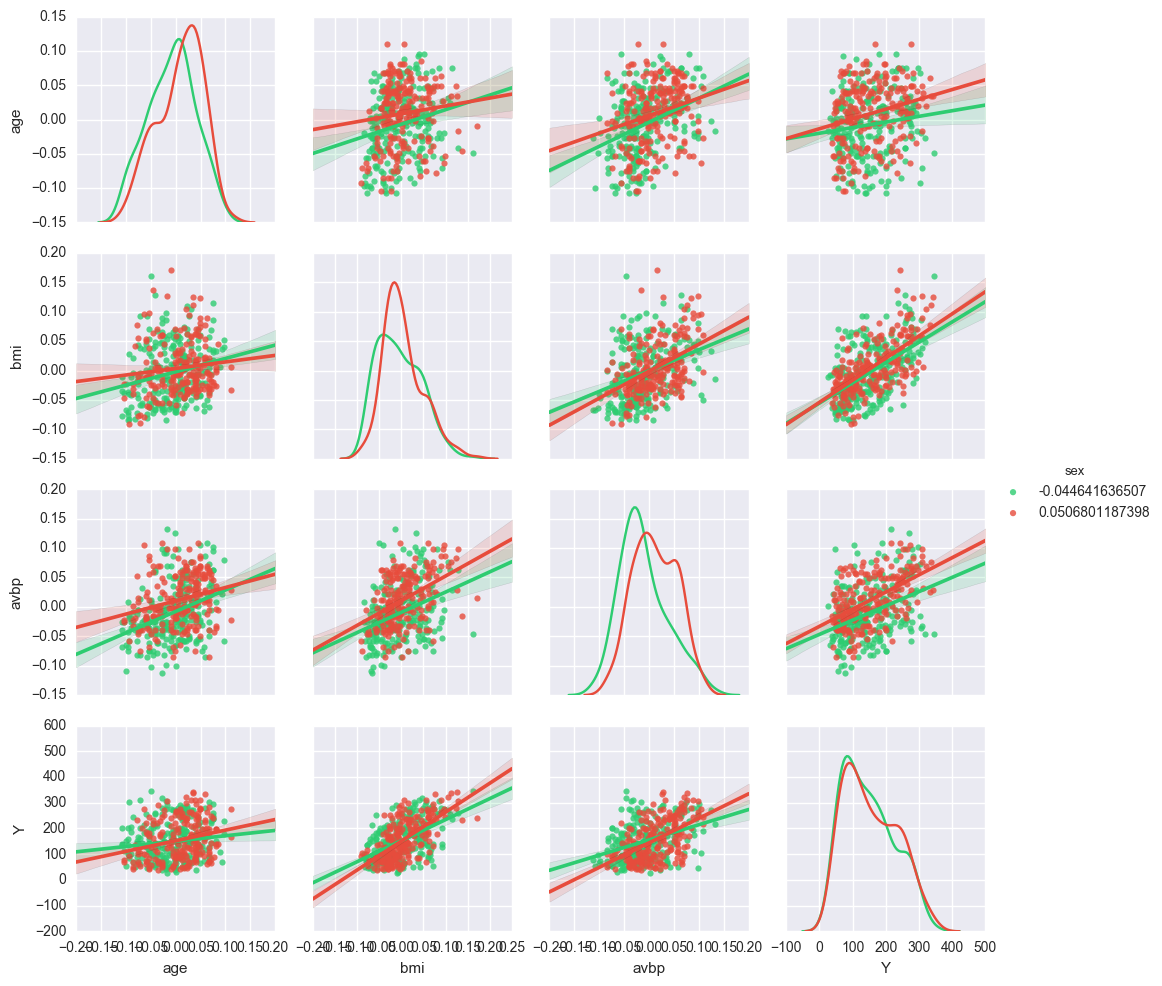

In [22]:
A = sns.pairplot(df, vars = ["age", "bmi", "avbp", "Y"], 
                 hue="sex", palette=["#2ecc71", "#e74c3c"], 
                 kind='reg', diag_kind='kde')

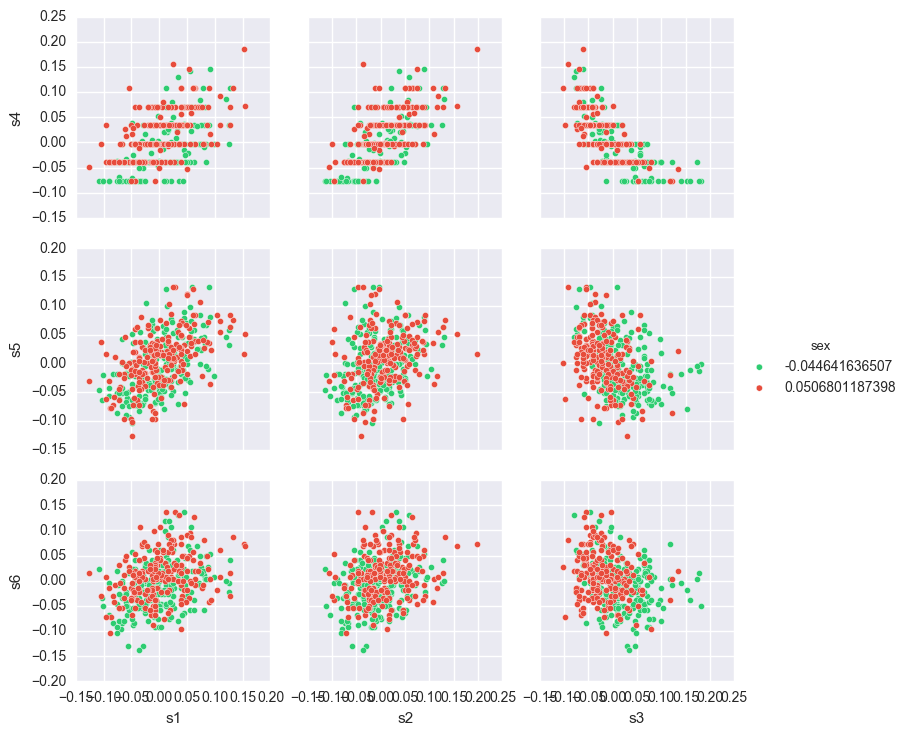

In [23]:
B = sns.pairplot(df, x_vars = ["s1", "s2", "s3"], 
                 y_vars =["s4" ,"s5", "s6"], hue="sex", 
                 palette=["#2ecc71", "#e74c3c"] )

### Now time has come to fit a model.
Obviously the type of data encourages regressive approach.

In [24]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    df[["age", "sex", "bmi", "avbp" , "s1", "s2", "s3", "s4", "s5", "s6"]], 
    df["Y"], test_size = 0.33, random_state = 1)

In [26]:
print ("Size of a training set :", x_train.shape, y_train.shape)
print ("Size of a test set :", x_test.shape, y_test.shape)

Size of a training set : (296, 10) (296,)
Size of a test set : (146, 10) (146,)


In [61]:
models = {'LinReg' : linear_model.LinearRegression(),
          'Ridge'  : linear_model.Ridge(),
          'RidgeCV': linear_model.RidgeCV(),
          'Lasso'  : linear_model.Lasso(max_iter = 1000),
          'LassoCV': linear_model.LassoCV(max_iter = 1000),
          'LassoLarsIC_AIC': linear_model.LassoLarsIC(criterion ='aic'),
          'LassoLarsIC_BIC': linear_model.LassoLarsIC(criterion ='bic'),
          'LassoLars' : linear_model.LassoLars(max_iter=1000),
          'ElasticNet' : linear_model.ElasticNet()          
        }

Major parameters for a batch of above models is called alpah

In [28]:
alphas = np.logspace(-10, 0.5, 40)

Below is a quick script to test all models, pick the best alpha for them and assert their training time.

In [62]:
scores = {}
t_check = []
t2 = 0
for name, model in models.items():
    for alpha in alphas:
        model.alpha = alpha
        if 'CV' in name:
            model.cv = 20
        #check time of training
        t1 = time.time()
        model.fit(x_train, y_train)
        t2 = time.time() - t1
        t_check.append((model.score(x_test, y_test), t2))
    scores[name] = (max(t_check))
    t_check = []

c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [63]:
for key in scores:
    print ("%s scored: %f ; training time : %f \n" 
           %(key, scores[key][0], scores[key][1]))

LassoCV scored: 0.385502 ; training time : 0.526937 

Lasso scored: 0.390209 ; training time : 0.013551 

RidgeCV scored: 0.385004 ; training time : 0.571405 

LinReg scored: 0.390209 ; training time : 0.001020 

LassoLars scored: 0.390209 ; training time : 0.003004 

LassoLarsIC_AIC scored: 0.387490 ; training time : 0.004522 

Ridge scored: 0.390209 ; training time : 0.000499 

ElasticNet scored: 0.390209 ; training time : 0.014511 

LassoLarsIC_BIC scored: 0.381975 ; training time : 0.016013 



Results are expected, none of the models initally scored even close 50% at its best value of alpha. But note, we have picked all the features. Let's be selective this time and look only at 2. If we come back to out gridplots, we can see that the relation age-bmi is occupied with relatively small dispersion - maybe it will be better tuned instance choice that previously? (TODO)

Perhaps some classification target would yield some more promising results. 
The "Y" parameter can be sort of reduced to a set of intervals 
    1. low "Y" indexing
    2. middle "Y" indexing
    3. high "Y" indexing

However, at first  glance it is difficult to determine what intervals to take. Since data is normalized, we can expect that 2. oscillates in the neighbourhood of mean, with 1. and 2. scatttered more to the left and right.

Let's look again at "Y" parameter and see if we can somehow come out with reasonable further quantization.

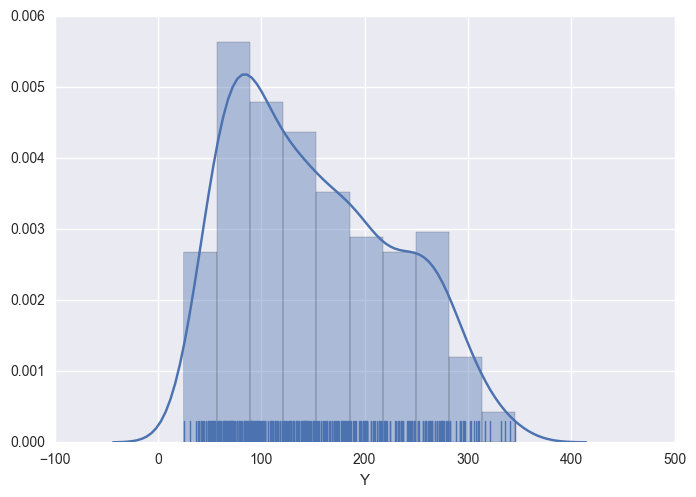

In [34]:
sns.distplot(df["Y"], kde=True, rug=True)

In [35]:
df["Y"].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: Y, dtype: float64

##### Obviously we can just take corresponding quartiles:
take 87 for low , 140.5 for middle , and 211.5 for high

In [36]:
class_df = pd.DataFrame({'class' : pd.Series(np.random.randn(442))})
print(class_df.head())
df2 = df
df2 = pd.concat([df2, class_df], axis =1)
print(df2.head())
df2['class'][df['Y'] <87 ] = 0
df2['class'][(df['Y'] >=87) & (df['Y'] <140.5) ] = 1
df2['class'][(df['Y'] >=140.5) & (df['Y'] < 211.5) ] = 2
df2['class'][df['Y'] >=211.5 ] = 3
print(df2.head())


      class
0  3.064163
1  0.739064
2 -0.344391
3 -0.124317
4  0.434228
        age       sex       bmi      avbp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6      Y     class  
0 -0.002592  0.019908 -0.017646  151.0  3.064163  
1 -0.039493 -0.068330 -0.092204   75.0  0.739064  
2 -0.002592  0.002864 -0.025930  141.0 -0.344391  
3  0.034309  0.022692 -0.009362  206.0 -0.124317  
4 -0.002592 -0.031991 -0.046641  135.0  0.434228  
        age       sex       bmi      avbp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642

In [37]:
df2['class'].tail()

437    2.0
438    1.0
439    1.0
440    3.0
441    0.0
Name: class, dtype: float64

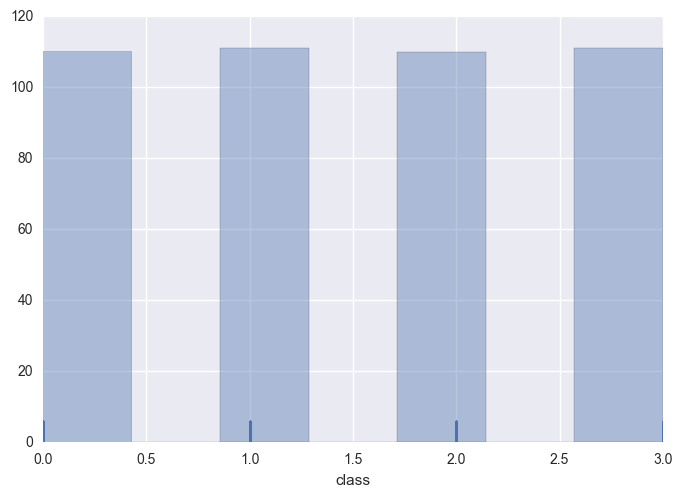

In [38]:
sns.distplot(df2['class'], kde=False, rug=True)

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df2[["age", "bmi", "avbp", "s1", "s2", "s3", "s4", "s5", "s6"]],
                                                    df2["class"], 
                                                    test_size=0.3, random_state = 1)

In [44]:
classifier_scores = {}
classifiers = {
    "KNN": KNeighborsClassifier(4),
    "SVC 1" : SVC(),
    "SVC 2" :SVC(gamma=2, C=1),
    "GauProcClas" : GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    "DecTreeClas" : DecisionTreeClassifier(),
    "RandForClas" : RandomForestClassifier(),
    "MLPC" : MLPClassifier(alpha=1),
    "Ada" : AdaBoostClassifier(),
    "GauNB" : GaussianNB(),
    "QuadDisc" : QuadraticDiscriminantAnalysis()}

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    classifier_scores[name] = clf.score(x_test, y_test)

c:\users\jakub\appdata\local\programs\python\python35-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [45]:
for key in classifier_scores:
    print("MODEL: %s score: %f"%(key, classifier_scores[key]))

MODEL: GauNB score: 0.458647
MODEL: SVC 2 score: 0.451128
MODEL: MLPC score: 0.428571
MODEL: Ada score: 0.390977
MODEL: DecTreeClas score: 0.330827
MODEL: GauProcClas score: 0.473684
MODEL: RandForClas score: 0.413534
MODEL: SVC 1 score: 0.218045
MODEL: KNN score: 0.368421
MODEL: QuadDisc score: 0.428571


Since MLP Classifier looks most promising I am going to see if it can get any better - also, increase the number of iterations since sklearn prompts a warning. 

In [70]:
    #this setup gave best results
    mlp = MLPClassifier(solver = 'lbfgs',learning_rate_init = 0.01, verbose=0, random_state=0,
                            max_iter=10000)
    mlp.fit(x_test, y_test)
    print("set score: %f" % mlp.score(x_test, y_test))

set score: 0.918919
set loss: 0.246581


#### To be continued